In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [9]:
def read_data(filename, seg_len, zero=True):
    filepath = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/MPhys Sem 1 SiPM-Scintillation (KeySight Oscilloscope)/"
    data = np.genfromtxt(filepath + filename, delimiter=',', skip_header=3)
    n_segs = len(data) // seg_len

    waveforms = np.zeros((n_segs, seg_len, 3))
    for i in range(n_segs):
        waveforms[i] = data[i*seg_len:(i+1)*seg_len]

    np.nan_to_num(waveforms[:,:,2], copy=False, nan=0)

    if zero==True:
        for waveform in waveforms:
            waveform[:,2] += np.abs(np.min(waveform[:,2]))
            plt.plot(waveform[:, 2])
    
    else: 
        for waveform in waveforms:
            plt.plot(waveform[:, 2])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Waveforms")
    plt.show()

    for waveform in waveforms:
        plt.plot(waveform[:, 1])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Trigger Signals")
    plt.show()

    return waveforms, n_segs

In [65]:
def find_roi(waveforms, n_segs, peak_start=0, turnover_start=0, turnover_end=0):

    for waveform in waveforms:
        waveform[:,2] += np.abs(np.min(waveform[:,2]))

    waveforms_sum = np.sum(waveforms, axis=0)
    savgol_filtered = savgol_filter(waveforms_sum[:, 2], 60, 9)
    savgol_filtered_deriv = savgol_filter(waveforms_sum[:, 2], 60, 9, deriv=1)

    avg = (waveforms_sum[:, 2] - np.mean(waveforms_sum[:, 2][0:500])) / n_segs
    avg_trig = waveforms_sum[:, 1] / n_segs

    turnover_point = np.argmin(savgol_filtered[turnover_start:turnover_end]) + turnover_start
    peak = np.argmax(savgol_filtered[peak_start:]) + peak_start

    plt.plot(waveforms_sum[:, 2], label="Summed Waveforms")
    plt.plot(savgol_filtered, label="Savitzky-Golay Filtered")
    plt.plot(savgol_filtered_deriv, label="Savitzky-Golay Filtered Derivative")
    plt.plot(turnover_point, savgol_filtered[turnover_point], 'ro', label="Turnover Point")
    plt.plot(peak, savgol_filtered[peak], 'bo', label="Peak")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Summed Waveforms")
    plt.legend()
    plt.show()

    return turnover_point, peak, avg

In [109]:
def integrate(waveforms, n_segs, start, peak, plot=False, title="add title"):
    areas = []

    for i in range(n_segs):
        x_data = waveforms[i, :, 0]
        y_data = waveforms[i, :, 2] - np.mean(waveforms[i, :, 2][0:500])

        roi = peak-start

        end = np.argmin(np.abs(y_data[peak:int(peak+4*roi)] - y_data[peak]/10)) + peak

        area = 0
        for j in range(int(end-start)):
            if y_data[j+start] + y_data[j+start+1] > 0:
                area += (x_data[j+start+1] - x_data[j+start]) * (y_data[j+start] + y_data[j+start+1]) / 2
            else: area +=0
        
        areas.append(area)

        if plot == True:
            plt.plot(x_data, y_data, '.', label="Noisy Data")
            plt.plot(x_data[start], y_data[start], 'ro', label="Start")
            plt.plot(x_data[peak], y_data[peak], 'bo', label="Peak")
            plt.plot(x_data[end], y_data[end], 'ko', label="End")
            plt.legend()
            plt.show()
    
    mean = np.mean(areas)
    std_dev = np.std(areas)

    plt.hist(areas, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Charge [Vs]")
    plt.ylabel("Frequency")
    plt.annotate(f"Mean: {mean:.2e}\nStd. Dev: {std_dev:.2e}", xy=(0.02, 0.9), xycoords='axes fraction')
    plt.show()

    return areas, mean, std_dev

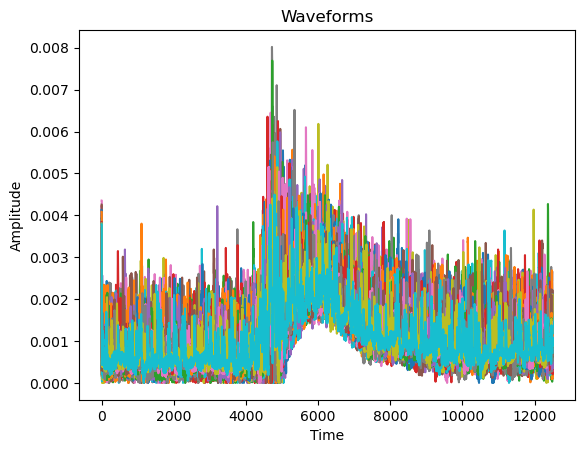

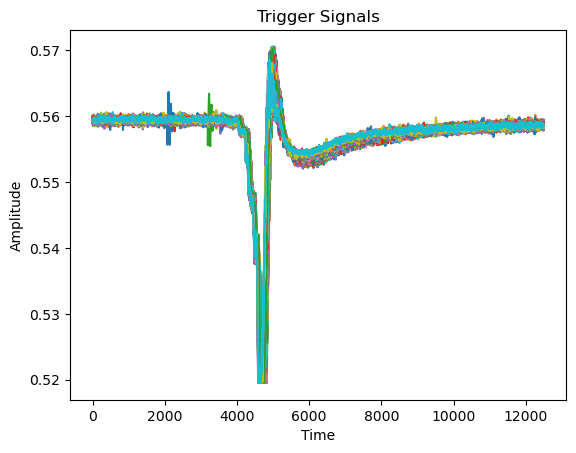

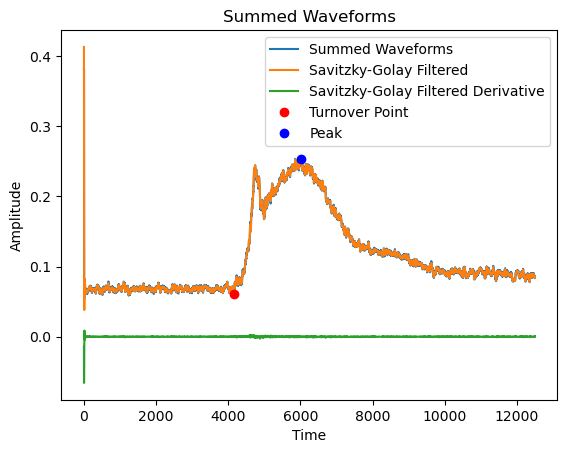

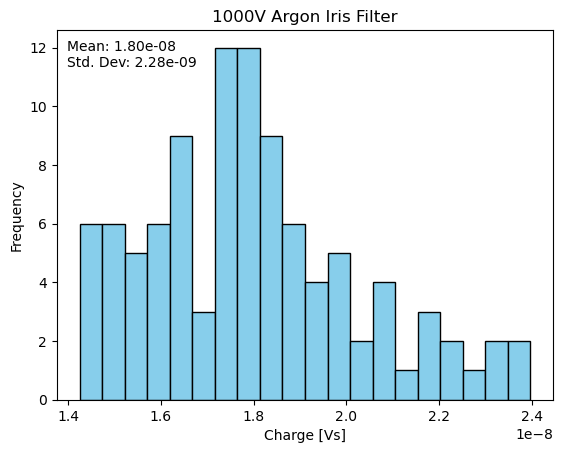

In [112]:
waveforms_1000V_Ar_iris_filter, n_segs_1000V_Ar_iris_filter = read_data("1000V_Ar_VUV_SiPM (06,12,2024).csv", 12500)
start_1000V_Ar_iris_filter, peak_1000V_Ar_iris_filter, avg_1000V_Ar_iris_filter = find_roi(waveforms_1000V_Ar_iris_filter, n_segs_1000V_Ar_iris_filter, peak_start = 500, turnover_start=4000, turnover_end=6000)
areas_1000V_Ar_iris_filter, mean_1000V_Ar_iris_filter, std_1000V_Ar_iris_filter = integrate(waveforms_1000V_Ar_iris_filter, n_segs_1000V_Ar_iris_filter, start_1000V_Ar_iris_filter, peak_1000V_Ar_iris_filter, title="1000V Argon Iris Filter", plot=False)

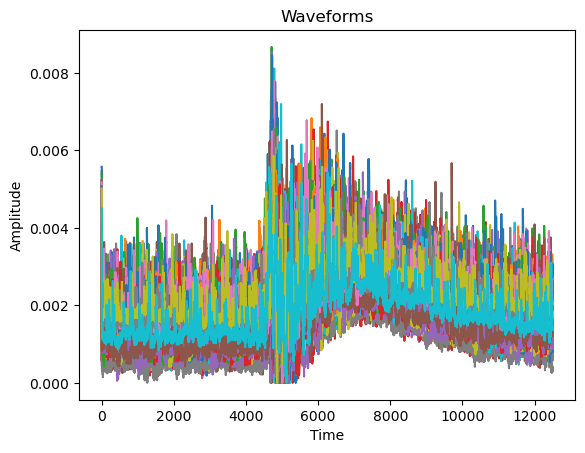

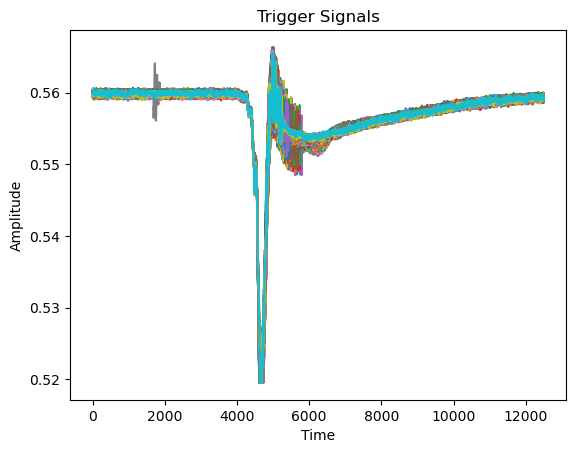

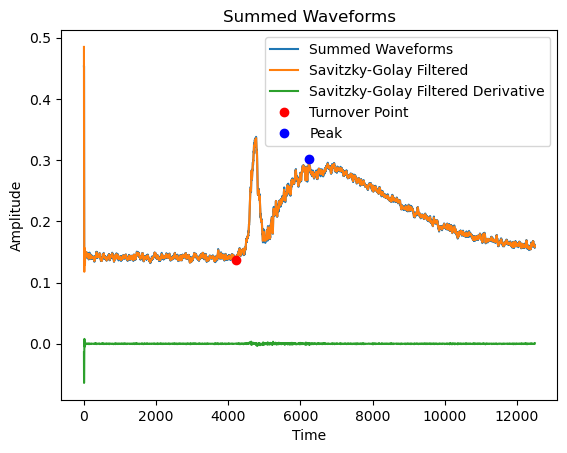

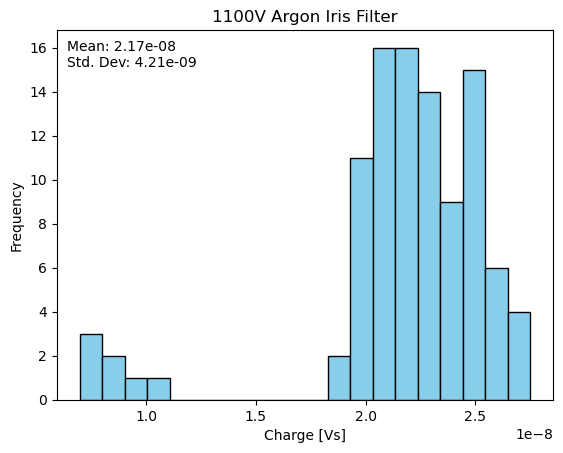

In [146]:
waveforms_1100V_Ar_iris_filter, n_segs_1100V_Ar_iris_filter = read_data("1100V_Ar_VUV_SiPM (06,12,2024).csv", 12500)
start_1100V_Ar_iris_filter, peak_1100V_Ar_iris_filter, avg_1100V_Ar_iris_filter = find_roi(waveforms_1100V_Ar_iris_filter, n_segs_1000V_Ar_iris_filter, peak_start=6000, turnover_start=4000, turnover_end=6000)
areas_1100V_Ar_iris_filter, mean_1100V_Ar_iris_filter, std_1100V_Ar_iris_filter = integrate(waveforms_1100V_Ar_iris_filter, n_segs_1100V_Ar_iris_filter, start_1100V_Ar_iris_filter, peak_1100V_Ar_iris_filter, title="1100V Argon Iris Filter")

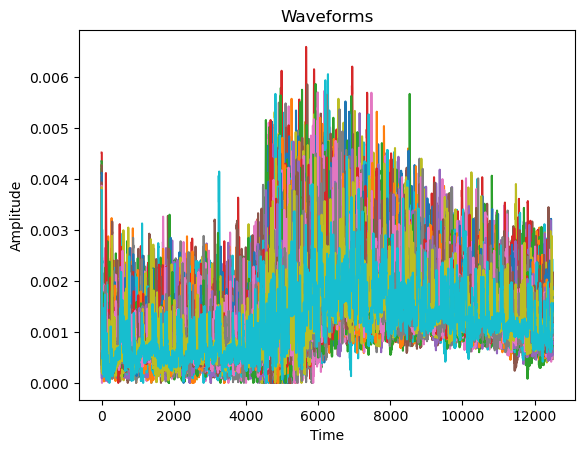

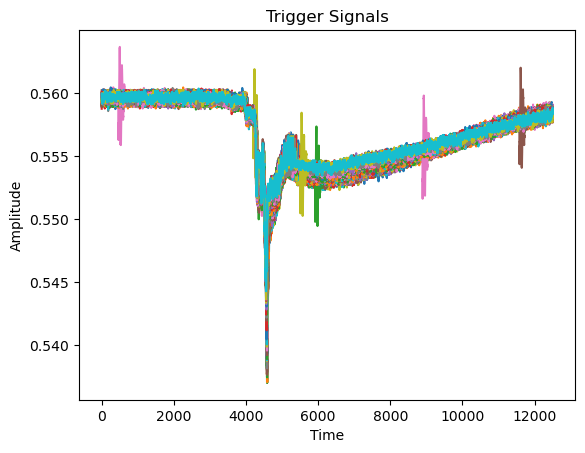

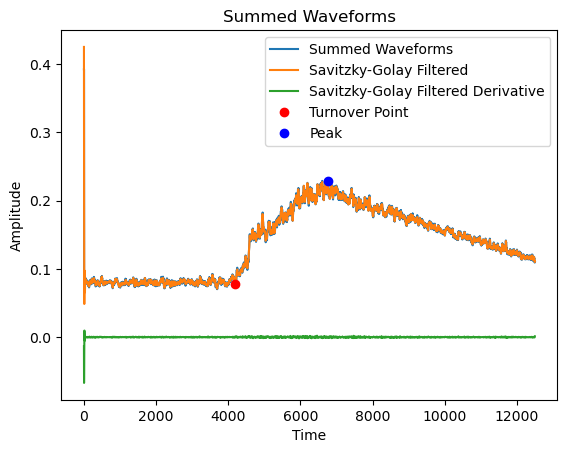

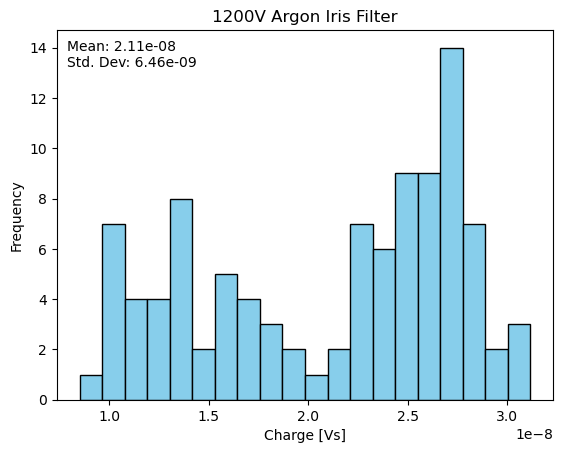

In [111]:
waveforms_1200V_Ar_iris_filter, n_segs_1200V_Ar_iris_filter = read_data("1200V_Ar_VUV_SiPM (06,12,2024).csv", 12500)
start_1200V_Ar_iris_filter, peak_1200V_Ar_iris_filter, avg_1200V_Ar_iris_filter = find_roi(waveforms_1200V_Ar_iris_filter, n_segs_1000V_Ar_iris_filter, peak_start=6000, turnover_start=4000, turnover_end=6000)
areas_1200V_Ar_iris_filter, mean_1200V_Ar_iris_filter, std_1200V_Ar_iris_filter = integrate(waveforms_1200V_Ar_iris_filter, n_segs_1200V_Ar_iris_filter, start_1200V_Ar_iris_filter, peak_1200V_Ar_iris_filter, title="1200V Argon Iris Filter")

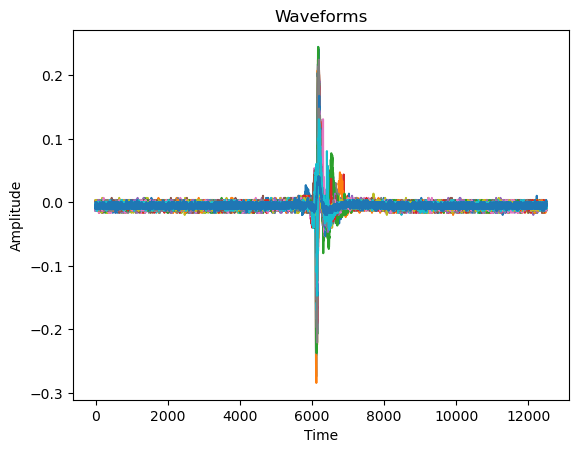

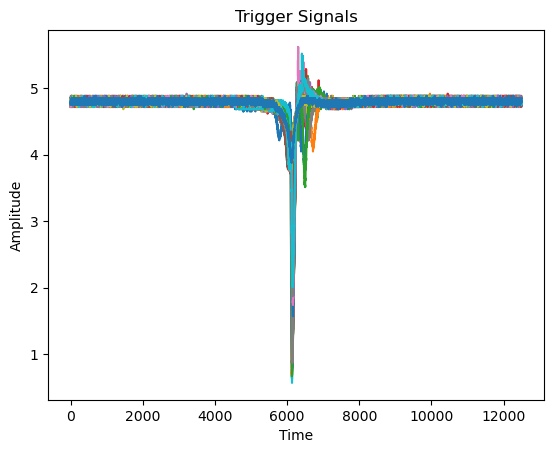

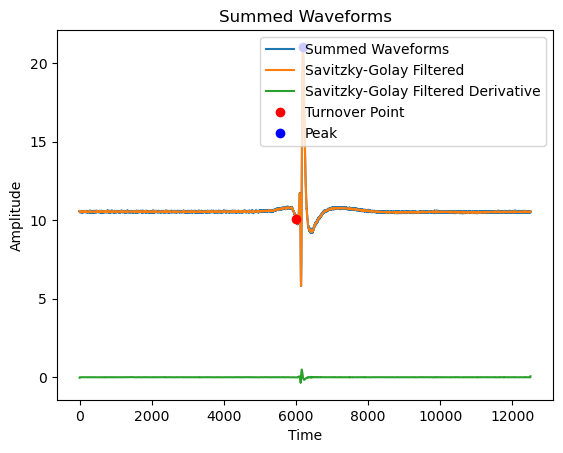

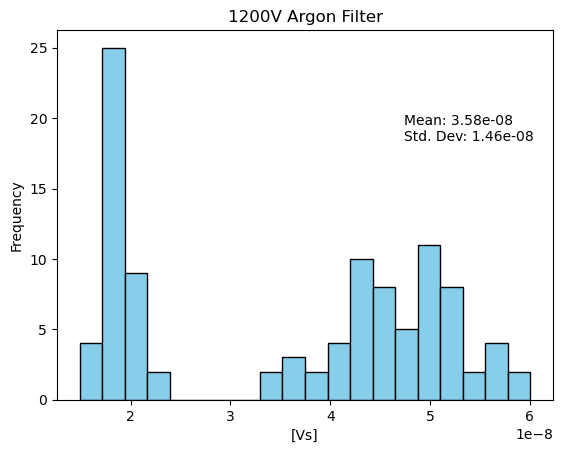

In [85]:
waveforms_1200V_Ar_filter, n_segs_1200V_Ar_filter = read_data("55V_1200V_Ar_filter.csv", 12500, zero=False)
start_1200V_Ar_filter, peak_1200V_Ar_filter, avg_1200V_Ar_filter = find_roi(waveforms_1200V_Ar_filter, n_segs_1200V_Ar_filter, peak_start=6000, turnover_start=5000, turnover_end=6000)
areas_1200V_Ar_filter = integrate(waveforms_1200V_Ar_filter, n_segs_1200V_Ar_filter, start_1200V_Ar_filter, peak_1200V_Ar_filter, title="1200V Argon Filter")

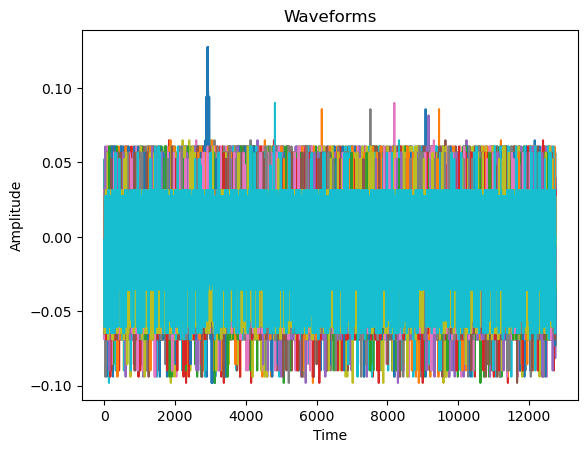

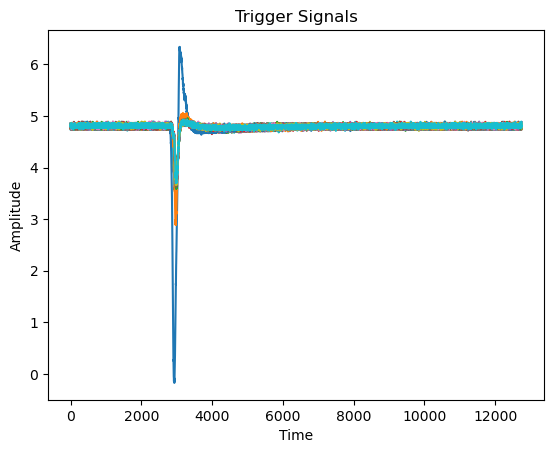

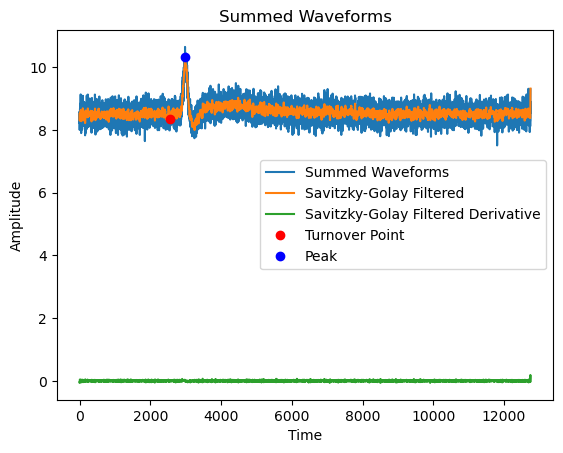

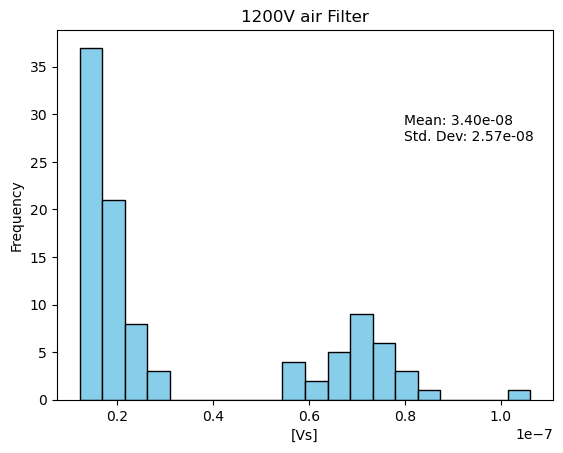

In [76]:
waveforms_1200V_air_filter, n_segs_1200V_air_filter = read_data("55V_1200V_air_filter.csv", 12750, zero=False)
start_1200V_air_filter, peak_1200V_air_filter, avg_1200V_air_filter = find_roi(waveforms_1200V_air_filter, n_segs_1200V_air_filter, peak_start=2000, turnover_start=2500, turnover_end=3000)
areas_1200V_air_filter = integrate(waveforms_1200V_air_filter, n_segs_1200V_air_filter, start_1200V_air_filter, peak_1200V_air_filter, title="1200V air Filter")

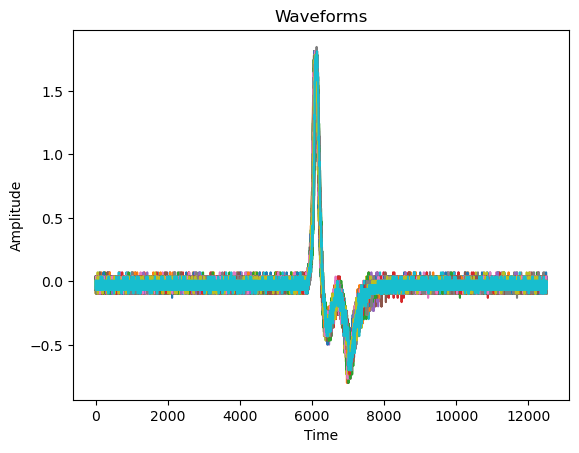

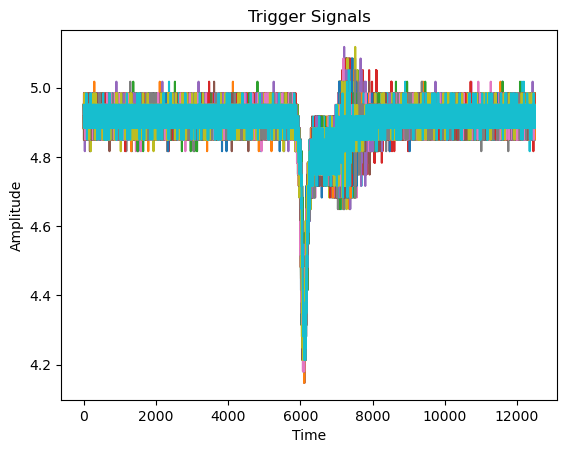

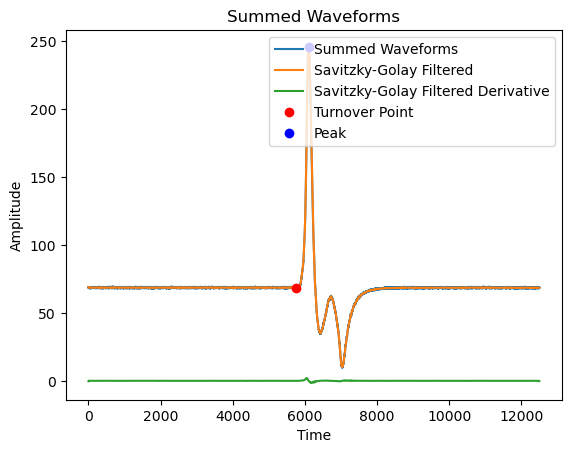

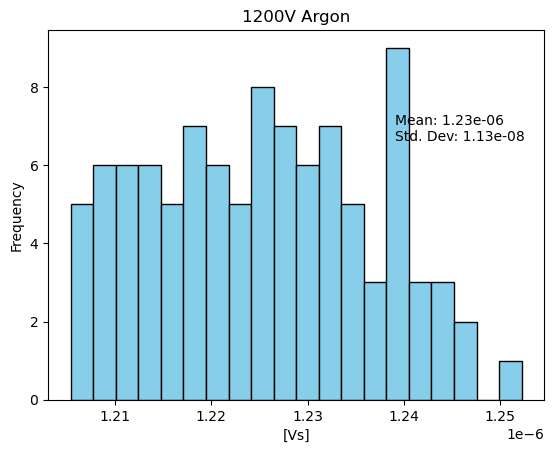

In [82]:
waveforms_1200V_Ar, n_segs_1200V_Ar = read_data("55V_1200V_Ar.csv", 12500, zero=False)
start_1200V_Ar, peak_1200V_Ar, avg_1200V_Ar = find_roi(waveforms_1200V_Ar, n_segs_1200V_Ar, peak_start=6000, turnover_start=5750, turnover_end=6000)
areas_1200V_Ar = integrate(waveforms_1200V_Ar, n_segs_1200V_Ar, start_1200V_Ar, peak_1200V_Ar, title="1200V Argon")

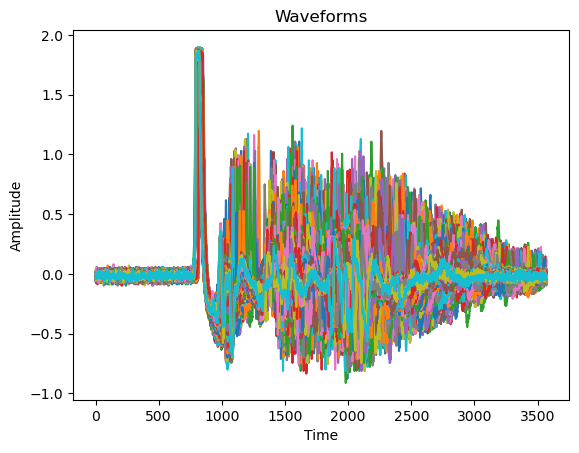

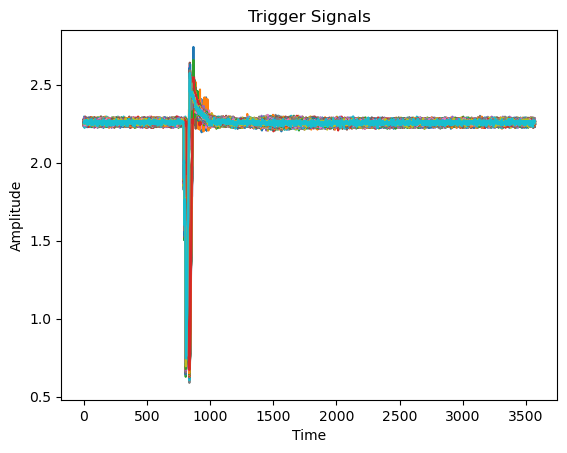

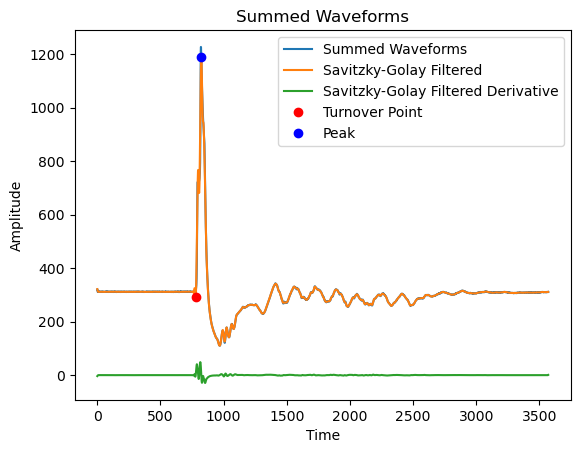

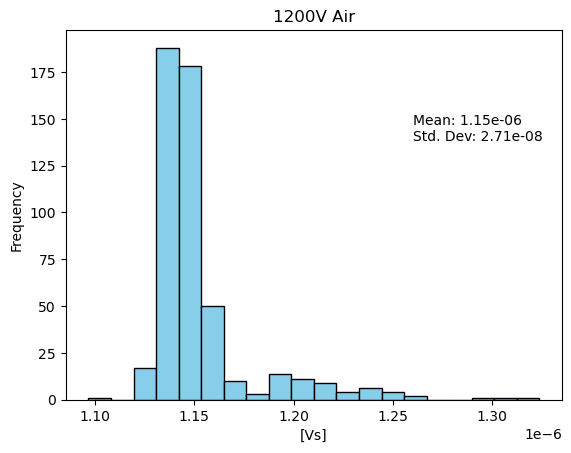

In [56]:
waveforms_1200V_air, n_segs_1200V_air = read_data("55V_1200V_air.csv", 3571, zero=False)
start_1200V_air, peak_1200V_air, avg_1200V_air, avg_trig_1200V_air = find_roi(waveforms_1200V_air, n_segs_1200V_air, peak_start=500, turnover_start=500, turnover_end=800)
areas_1200V_air = integrate(waveforms_1200V_air, n_segs_1200V_air, start_1200V_air, peak_1200V_air, title="1200V Air")

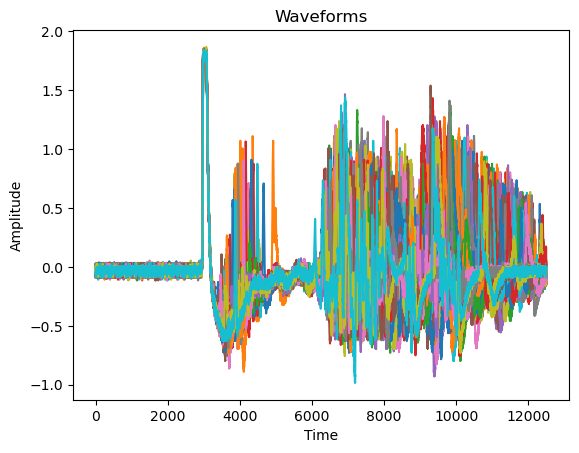

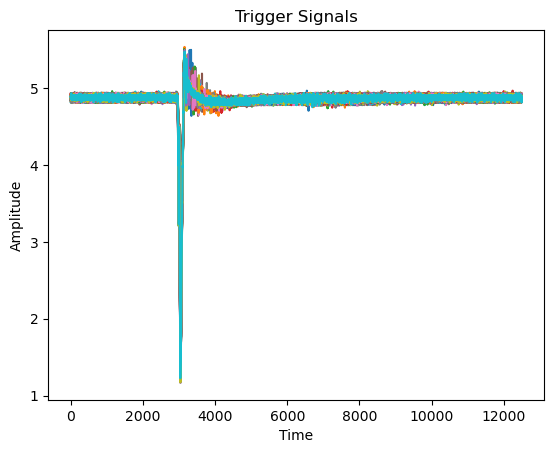

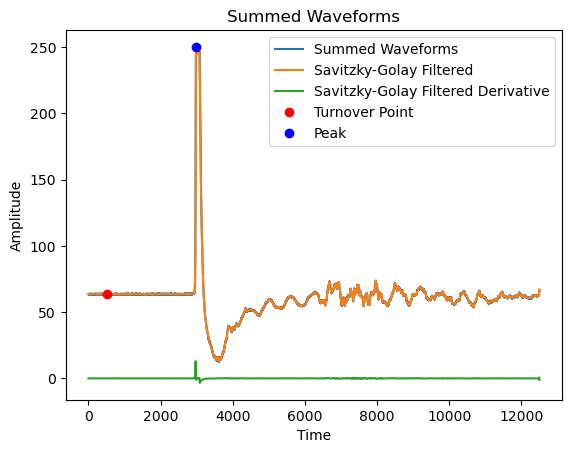

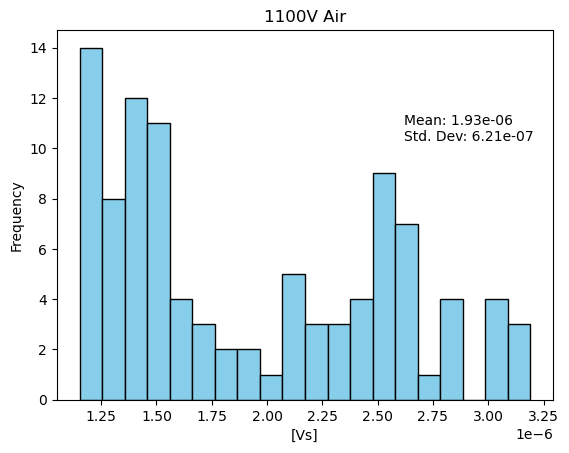

In [87]:
waveforms_1100V_air, n_segs_1100V_air = read_data("55V_1100V_air.csv", 12500, zero=False)
start_1100V_air, peak_1100V_air, avg_1100V_air = find_roi(waveforms_1100V_air, n_segs_1100V_air, peak_start=500, turnover_start=500, turnover_end=800)
areas_1100V_air = integrate(waveforms_1100V_air, n_segs_1100V_air, start_1100V_air, peak_1100V_air, title="1100V Air")

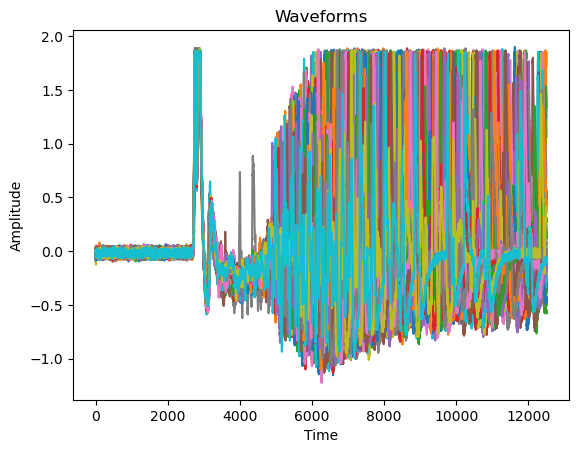

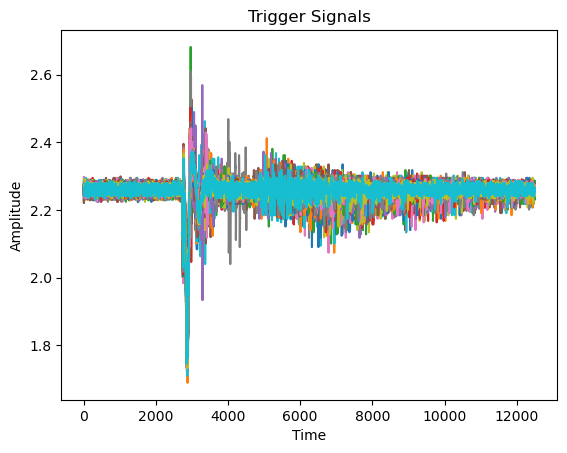

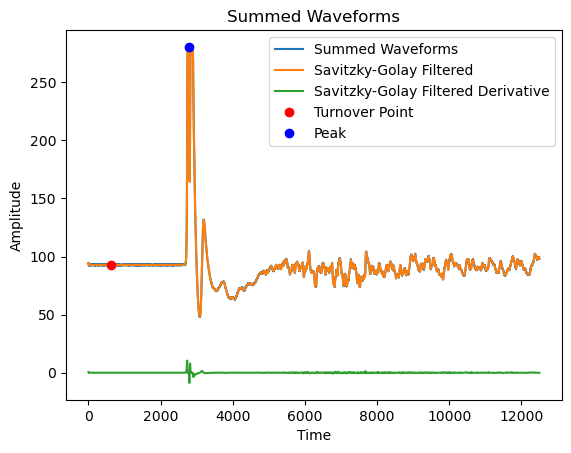

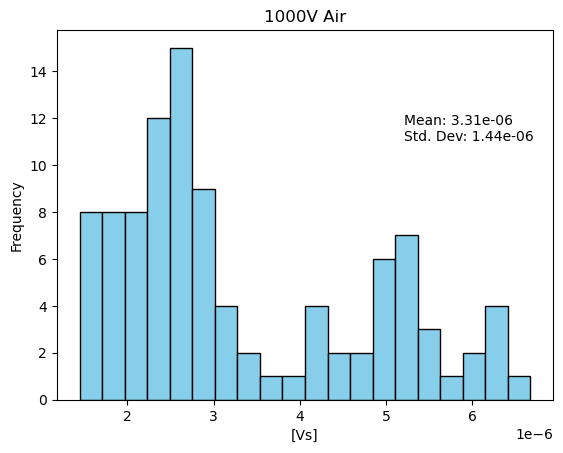

In [88]:
waveforms_1000V_air, n_segs_1000V_air = read_data("55V_1000V_air.csv", 12500, zero=False)
start_1000V_air, peak_1000V_air, avg_1000V_air = find_roi(waveforms_1000V_air, n_segs_1000V_air, peak_start=500, turnover_start=500, turnover_end=800)
areas_1000V_air = integrate(waveforms_1000V_air, n_segs_1000V_air, start_1000V_air, peak_1000V_air, title="1000V Air")

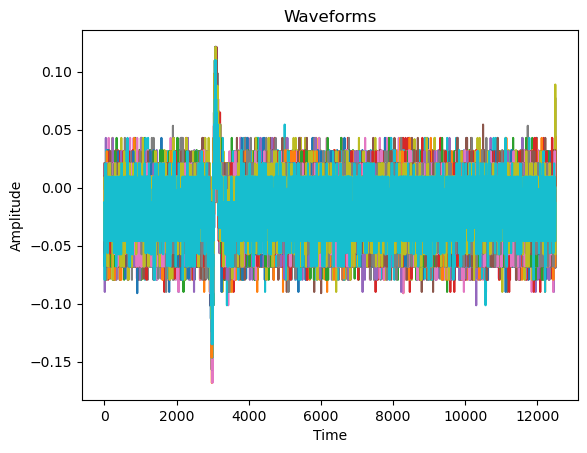

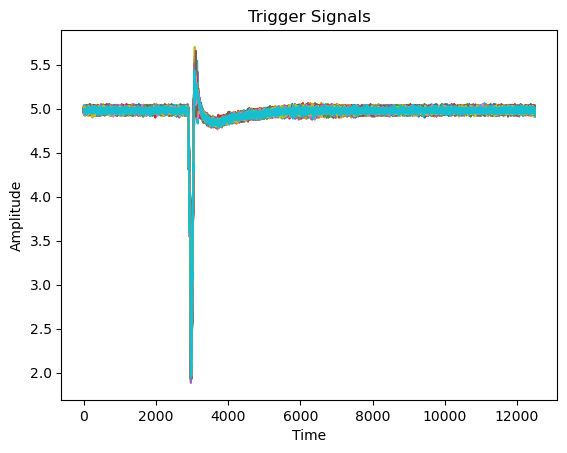

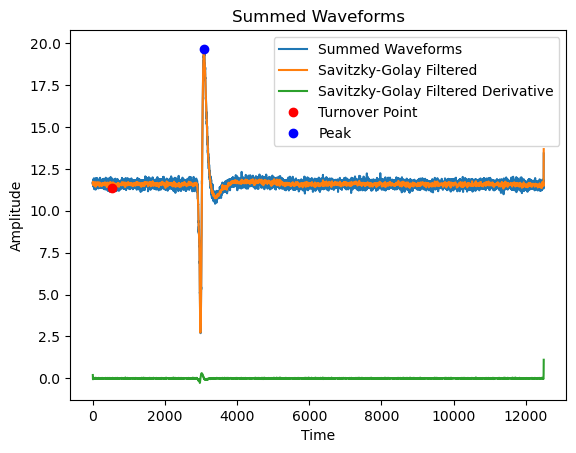

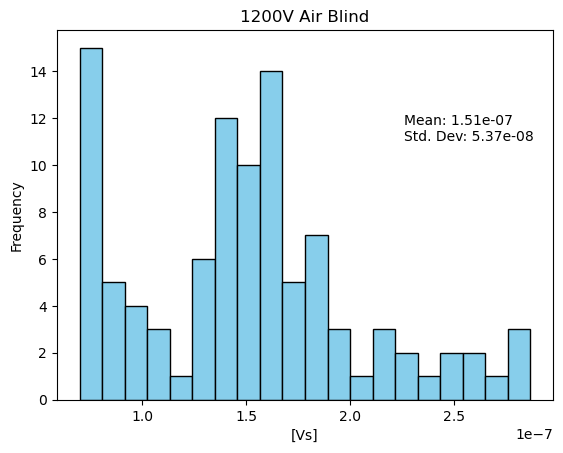

In [52]:
waveforms_1200V_air_blind, n_segs_1200V_air_blind = read_data("55V_1200V_air_blind.csv", 12500, zero=False)
start_1200V_air_blind, peak_1200V_air_blind, avg_1200V_air_blind = find_roi(waveforms_1200V_air_blind, n_segs_1200V_air_blind, peak_start=500, turnover_start=500, turnover_end=800)
areas_1200V_air_blind = integrate(waveforms_1200V_air_blind, n_segs_1200V_air_blind, start_1200V_air_blind, peak_1200V_air_blind, title="1200V Air Blind")

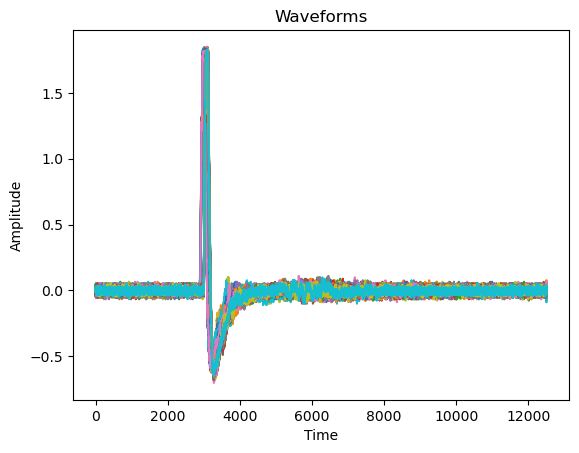

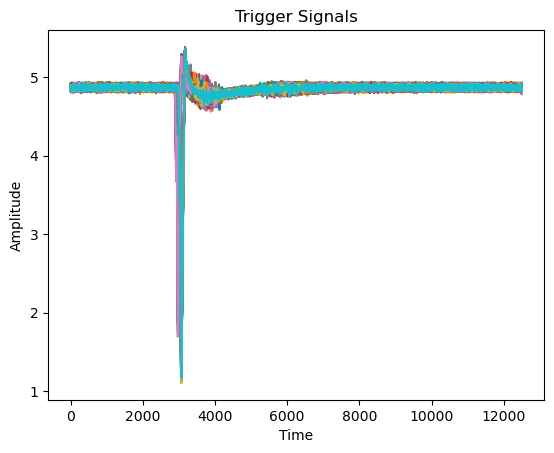

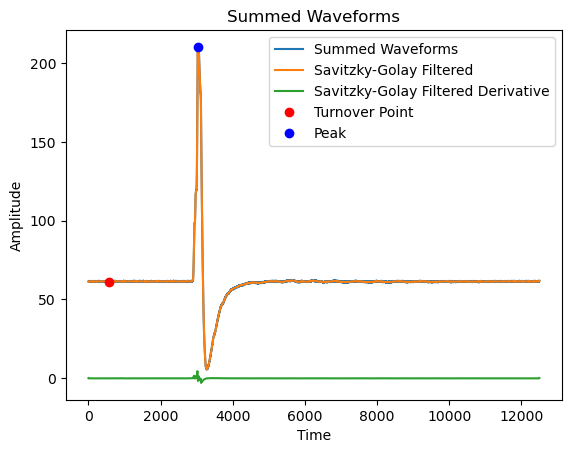

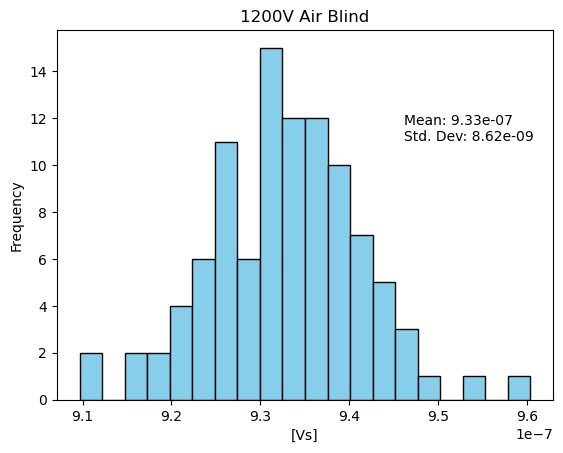

In [66]:
waveforms_1200V_air_iris, n_segs_1200V_air_iris = read_data("55V_1200V_air_iris.csv", 12500, zero=False)
start_1200V_air_iris, peak_1200V_air_iris, avg_1200V_air_iris = find_roi(waveforms_1200V_air_iris, n_segs_1200V_air_iris, peak_start=500, turnover_start=500, turnover_end=800)
areas_1200V_air_iris = integrate(waveforms_1200V_air_iris, n_segs_1200V_air_iris, start_1200V_air_iris, peak_1200V_air_iris, title="1200V Air Blind")

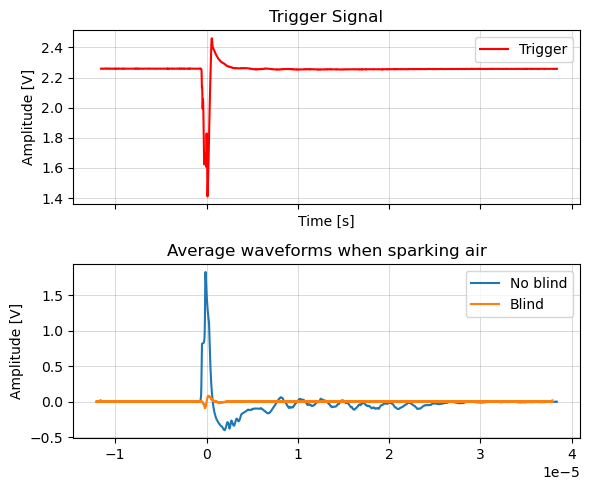

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

ax1.plot(waveforms_1200V_air[0, :, 0], avg_trig_1200V_air, color='red', label="Trigger")
ax1.set_title("Trigger Signal")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude [V]")
ax1.legend(loc="upper right")
ax1.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

ax2.plot(waveforms_1200V_air[0, :, 0], avg_1200V_air, label="No blind")
ax2.plot(waveforms_1200V_air_blind[0, :, 0], avg_1200V_air_blind, label="Blind")
ax2.set_title("Average waveforms when sparking air")
ax2.set_ylabel("Amplitude [V]")
ax2.legend(loc="upper right")
ax2.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

plt.tight_layout()

plt.show()


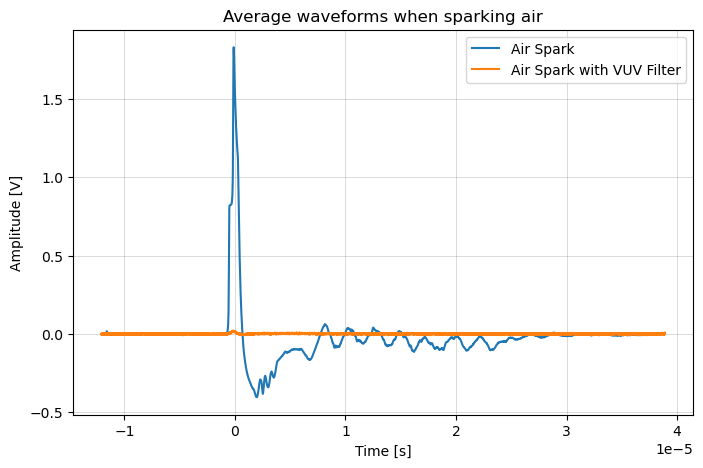

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(waveforms_1200V_air[0, :, 0], avg_1200V_air, label="Air Spark")
#plt.plot(waveforms_1200V_air_iris[0, :, 0], avg_1200V_air_iris, label="Iris")
plt.plot(waveforms_1200V_air_filter[0, :, 0], avg_1200V_air_filter, label="Air Spark with VUV Filter")
plt.title("Average waveforms when sparking air")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)
#plt.yscale('log')
plt.show()

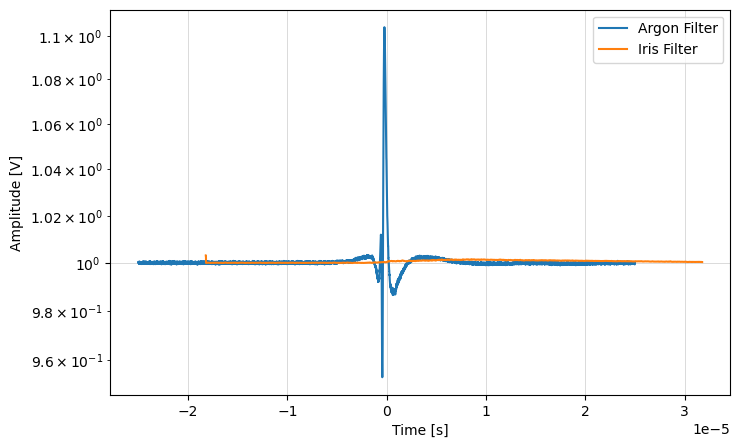

In [147]:
plt.figure(figsize=(8, 5))
plt.plot(waveforms_1200V_Ar_filter[0, :, 0], avg_1200V_Ar_filter+1, label="Argon Filter")
plt.plot(waveforms_1200V_Ar_iris_filter[0, :, 0], avg_1200V_Ar_iris_filter+1, label="Iris Filter")
#plt.title("Average waveforms when sparking air")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)
plt.yscale('log')
plt.show()

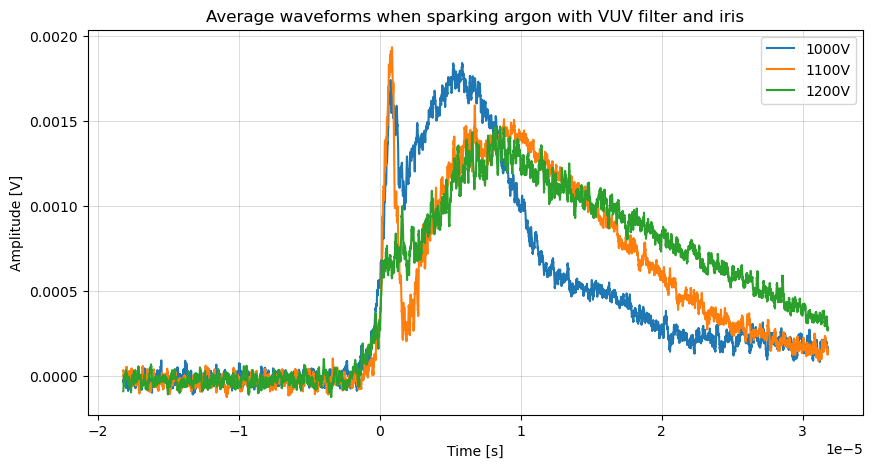

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(waveforms_1000V_Ar_iris_filter[0,:,0][5:], avg_1000V_Ar_iris_filter[5:], label="1000V")
plt.plot(waveforms_1100V_Ar_iris_filter[0,:,0][5:], avg_1100V_Ar_iris_filter[5:], label="1100V")
plt.plot(waveforms_1200V_Ar_iris_filter[0,:,0][5:], avg_1200V_Ar_iris_filter[5:], label="1200V")
plt.title("Average waveforms when sparking argon with VUV filter and iris")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)
plt.show()

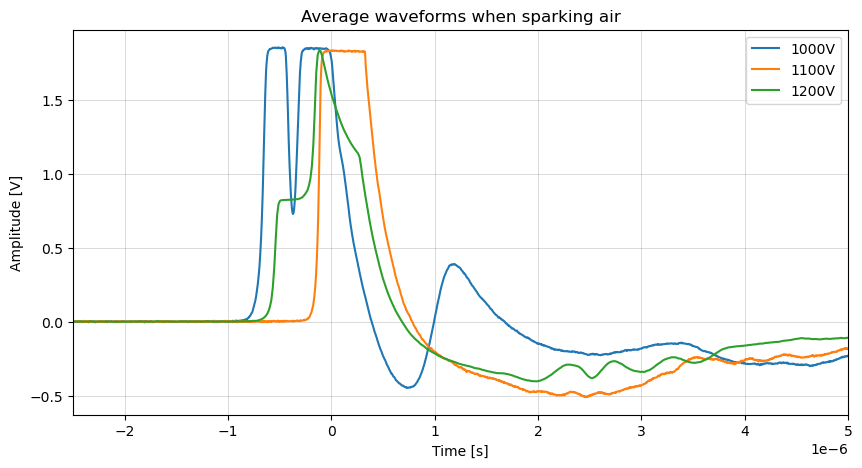

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(waveforms_1000V_air[0,:,0], avg_1000V_air, label="1000V")
plt.plot(waveforms_1100V_air[0,:,0], avg_1100V_air, label="1100V")
plt.plot(waveforms_1200V_air[0,:,0], avg_1200V_air, label="1200V")
plt.title("Average waveforms when sparking air")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [V]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)
plt.xlim(-0.25e-5, 0.5e-5)
plt.show()

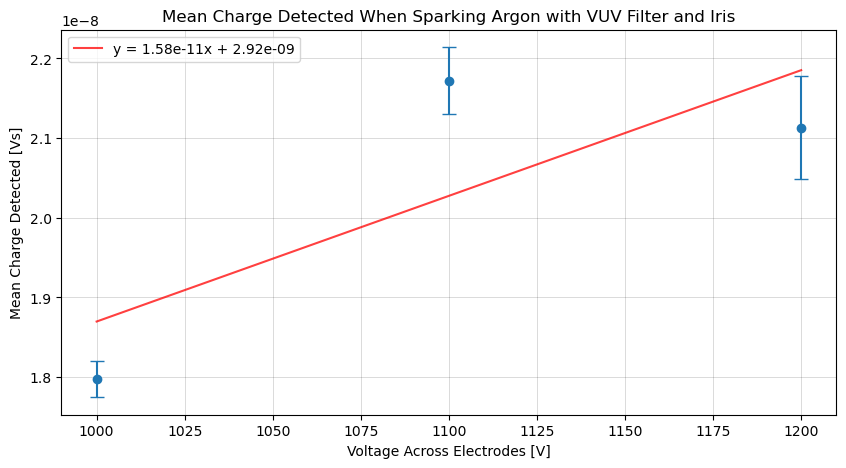

In [148]:
# Data points
voltages = np.array([1000, 1100, 1200])
means = np.array([mean_1000V_Ar_iris_filter, mean_1100V_Ar_iris_filter, mean_1200V_Ar_iris_filter])
std_devs = np.array([std_1000V_Ar_iris_filter, std_1100V_Ar_iris_filter, std_1200V_Ar_iris_filter])

# Fit a line to the data
coefficients = np.polyfit(voltages, means, 1)  # Linear fit (degree 1)
slope, intercept = coefficients

# Generate x values for the line of best fit
x_fit = np.linspace(min(voltages), max(voltages), 100)
y_fit = slope * x_fit + intercept

# Plot the data with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(voltages, means, yerr=std_devs/10, fmt='o', capsize=5)
plt.plot(x_fit, y_fit, label=f"y = {slope:.2e}x + {intercept:.2e}", color='red', alpha=0.75)

# Add labels, title, and grid
plt.title("Mean Charge Detected When Sparking Argon with VUV Filter and Iris")
plt.xlabel("Voltage Across Electrodes [V]")
plt.ylabel("Mean Charge Detected [Vs]")
plt.legend()
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.2)

# Show the plot
plt.show()